# Brief JO 

### Import the packages 

In [1]:
# Import the packages
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

### Read the files and display what they have inside them 

In [3]:
# Read the files
athletes = pd.read_csv("data/olympic_athletes.csv")
medals = pd.read_csv("data/olympic_medals.csv")
hosts = pd.read_csv("data/olympic_hosts.csv")
results = pd.read_csv("data/olympic_results.csv")
results_pkl = pd.read_pickle("data/olympic_results.pkl")

In [4]:
athletes.head()

,athlete_url,athlete_full_name,games_participations,first_game,athlete_year_birth,athlete_medals,bio
0,https://olympics.com/en/athletes/cooper-woods-...,Cooper WOODS-TOPALOVIC,1,Beijing 2022,2000.0,NaN,NaN
1,https://olympics.com/en/athletes/elofsson,Felix ELOFSSON,2,PyeongChang 2018,1995.0,NaN,NaN
2,https://olympics.com/en/athletes/dylan-walczyk,Dylan WALCZYK,1,Beijing 2022,1993.0,NaN,NaN
3,https://olympics.com/en/athletes/olli-penttala,Olli PENTTALA,1,Beijing 2022,1995.0,NaN,NaN
4,https://olympics.com/en/athletes/reikherd,Dmitriy REIKHERD,1,Beijing 2022,1989.0,NaN,NaN


In [5]:
medals.head()

,discipline_title,slug_game,event_title,event_gender,medal_type,participant_type,participant_title,athlete_url,athlete_full_name,country_name,country_code,country_3_letter_code
0,Curling,beijing-2022,Mixed Doubles,Mixed,GOLD,GameTeam,Italy,https://olympics.com/en/athletes/stefania-cons...,Stefania CONSTANTINI,Italy,IT,ITA
1,Curling,beijing-2022,Mixed Doubles,Mixed,GOLD,GameTeam,Italy,https://olympics.com/en/athletes/amos-mosaner,Amos MOSANER,Italy,IT,ITA
2,Curling,beijing-2022,Mixed Doubles,Mixed,SILVER,GameTeam,Norway,https://olympics.com/en/athletes/kristin-skaslien,Kristin SKASLIEN,Norway,NO,NOR
3,Curling,beijing-2022,Mixed Doubles,Mixed,SILVER,GameTeam,Norway,https://olympics.com/en/athletes/magnus-nedreg...,Magnus NEDREGOTTEN,Norway,NO,NOR
4,Curling,beijing-2022,Mixed Doubles,Mixed,BRONZE,GameTeam,Sweden,https://olympics.com/en/athletes/almida-de-val,Almida DE VAL,Sweden,SE,SWE


In [6]:
hosts.head()

,game_slug,game_end_date,game_start_date,game_location,game_name,game_season,game_year
0,beijing-2022,2022-02-20T12:00:00Z,2022-02-04T15:00:00Z,China,Beijing 2022,Winter,2022
1,tokyo-2020,2021-08-08T14:00:00Z,2021-07-23T11:00:00Z,Japan,Tokyo 2020,Summer,2020
2,pyeongchang-2018,2018-02-25T08:00:00Z,2018-02-08T23:00:00Z,Republic of Korea,PyeongChang 2018,Winter,2018
3,rio-2016,2016-08-21T21:00:00Z,2016-08-05T12:00:00Z,Brazil,Rio 2016,Summer,2016
4,sochi-2014,2014-02-23T16:00:00Z,2014-02-07T04:00:00Z,Russian Federation,Sochi 2014,Winter,2014


In [7]:
results.head()

,discipline_title,event_title,slug_game,participant_type,medal_type,athletes,rank_equal,rank_position,country_name,country_code,country_3_letter_code,athlete_url,athlete_full_name,value_unit,value_type
0,Curling,Mixed Doubles,beijing-2022,GameTeam,GOLD,"[('Stefania CONSTANTINI', 'https://olympics.co...",False,1,Italy,IT,ITA,NaN,NaN,NaN,NaN
1,Curling,Mixed Doubles,beijing-2022,GameTeam,SILVER,"[('Kristin SKASLIEN', 'https://olympics.com/en...",False,2,Norway,NO,NOR,NaN,NaN,NaN,NaN
2,Curling,Mixed Doubles,beijing-2022,GameTeam,BRONZE,"[('Almida DE VAL', 'https://olympics.com/en/at...",False,3,Sweden,SE,SWE,NaN,NaN,NaN,NaN
3,Curling,Mixed Doubles,beijing-2022,GameTeam,NaN,"[('Jennifer DODDS', 'https://olympics.com/en/a...",False,4,Great Britain,GB,GBR,NaN,NaN,NaN,NaN
4,Curling,Mixed Doubles,beijing-2022,GameTeam,NaN,"[('Rachel HOMAN', 'https://olympics.com/en/ath...",False,5,Canada,CA,CAN,NaN,NaN,NaN,NaN


In [8]:
# Compare results and results_pkl
results_pkl.reset_index(inplace=True, drop=True) # to have the same indexes

In [9]:
results_pkl.loc[:,"athletes"] = ["{}".format(results_pkl.loc[i,"athletes"]) for i in results_pkl.index] # To put the athletes in the same format
results_pkl = results_pkl.replace(r'^\s*$', None, regex=True) # To replace empty cells by nan
results_pkl = results_pkl.replace('NA', None) # To replace NA cells by nan
results_pkl = results_pkl.replace('nan', None) # To replace 'nan' cells by nan
results.compare(results_pkl) # If nothing outputs, it means they are equal

Empty DataFrame
Columns: []
Index: []

### Merge the dataframe hosts and results to have game season in results 

In [10]:
results_hosts = hosts.merge(results, how='left', left_on='game_slug', right_on='slug_game')
results_hosts.head()

,game_slug,game_end_date,game_start_date,game_location,game_name,game_season,game_year,discipline_title,event_title,slug_game,...,athletes,rank_equal,rank_position,country_name,country_code,country_3_letter_code,athlete_url,athlete_full_name,value_unit,value_type
0,beijing-2022,2022-02-20T12:00:00Z,2022-02-04T15:00:00Z,China,Beijing 2022,Winter,2022,Curling,Mixed Doubles,beijing-2022,...,"[('Stefania CONSTANTINI', 'https://olympics.co...",False,1,Italy,IT,ITA,NaN,NaN,NaN,NaN
1,beijing-2022,2022-02-20T12:00:00Z,2022-02-04T15:00:00Z,China,Beijing 2022,Winter,2022,Curling,Mixed Doubles,beijing-2022,...,"[('Kristin SKASLIEN', 'https://olympics.com/en...",False,2,Norway,NO,NOR,NaN,NaN,NaN,NaN
2,beijing-2022,2022-02-20T12:00:00Z,2022-02-04T15:00:00Z,China,Beijing 2022,Winter,2022,Curling,Mixed Doubles,beijing-2022,...,"[('Almida DE VAL', 'https://olympics.com/en/at...",False,3,Sweden,SE,SWE,NaN,NaN,NaN,NaN
3,beijing-2022,2022-02-20T12:00:00Z,2022-02-04T15:00:00Z,China,Beijing 2022,Winter,2022,Curling,Mixed Doubles,beijing-2022,...,"[('Jennifer DODDS', 'https://olympics.com/en/a...",False,4,Great Britain,GB,GBR,NaN,NaN,NaN,NaN
4,beijing-2022,2022-02-20T12:00:00Z,2022-02-04T15:00:00Z,China,Beijing 2022,Winter,2022,Curling,Mixed Doubles,beijing-2022,...,"[('Rachel HOMAN', 'https://olympics.com/en/ath...",False,5,Canada,CA,CAN,NaN,NaN,NaN,NaN


### Take the Greece results 

In [11]:
# Filter the data to get the Greece results
res_gr = results_hosts[(results_hosts["country_code"].isin(["US", "GR", "IT"]))

In [12]:
res_gr_summer = res_gr[res_gr["game_season"] == "Summer"]
res_gr_summer.head()

,game_slug,game_end_date,game_start_date,game_location,game_name,game_season,game_year,discipline_title,event_title,slug_game,...,athletes,rank_equal,rank_position,country_name,country_code,country_3_letter_code,athlete_url,athlete_full_name,value_unit,value_type
3786,tokyo-2020,2021-08-08T14:00:00Z,2021-07-23T11:00:00Z,Japan,Tokyo 2020,Summer,2020,Shooting,Trap Mixed Team,tokyo-2020,...,"[('Madelynn Ann BERNAU', 'https://olympics.com...",False,3,United States of America,US,USA,NaN,NaN,NaN,NaN
3795,tokyo-2020,2021-08-08T14:00:00Z,2021-07-23T11:00:00Z,Japan,Tokyo 2020,Summer,2020,Shooting,Trap Mixed Team,tokyo-2020,...,"[('Jessica ROSSI', 'https://olympics.com/en/at...",False,12,Italy,IT,ITA,NaN,NaN,NaN,NaN
3796,tokyo-2020,2021-08-08T14:00:00Z,2021-07-23T11:00:00Z,Japan,Tokyo 2020,Summer,2020,Shooting,Trap Mixed Team,tokyo-2020,...,"[('Kayle BROWNING', 'https://olympics.com/en/a...",False,13,United States of America,US,USA,NaN,NaN,NaN,NaN
3801,tokyo-2020,2021-08-08T14:00:00Z,2021-07-23T11:00:00Z,Japan,Tokyo 2020,Summer,2020,Shooting,50m Rifle 3 Positions women,tokyo-2020,...,NaN,False,5,United States of America,US,USA,https://olympics.com/en/athletes/sagen-maddalena,Sagen MADDALENA,NaN,NaN
3825,tokyo-2020,2021-08-08T14:00:00Z,2021-07-23T11:00:00Z,Japan,Tokyo 2020,Summer,2020,Shooting,50m Rifle 3 Positions women,tokyo-2020,...,NaN,False,13,United States of America,US,USA,https://olympics.com/en/athletes/mary-carolynn...,Mary Carolynn TUCKER,NaN,NaN


In [13]:
# Insert dates into the csv in order to use them in the dashboard
dates = []
for value in res_gr_summer["game_slug"].values:
    dates.append(int(value.split("-")[-1]))
    
res_gr_summer.insert(22, "date", np.array(dates))

In [14]:
res_gr_summer.head()

,game_slug,game_end_date,game_start_date,game_location,game_name,game_season,game_year,discipline_title,event_title,slug_game,...,rank_equal,rank_position,country_name,country_code,country_3_letter_code,athlete_url,athlete_full_name,value_unit,value_type,date
3786,tokyo-2020,2021-08-08T14:00:00Z,2021-07-23T11:00:00Z,Japan,Tokyo 2020,Summer,2020,Shooting,Trap Mixed Team,tokyo-2020,...,False,3,United States of America,US,USA,NaN,NaN,NaN,NaN,2020
3795,tokyo-2020,2021-08-08T14:00:00Z,2021-07-23T11:00:00Z,Japan,Tokyo 2020,Summer,2020,Shooting,Trap Mixed Team,tokyo-2020,...,False,12,Italy,IT,ITA,NaN,NaN,NaN,NaN,2020
3796,tokyo-2020,2021-08-08T14:00:00Z,2021-07-23T11:00:00Z,Japan,Tokyo 2020,Summer,2020,Shooting,Trap Mixed Team,tokyo-2020,...,False,13,United States of America,US,USA,NaN,NaN,NaN,NaN,2020
3801,tokyo-2020,2021-08-08T14:00:00Z,2021-07-23T11:00:00Z,Japan,Tokyo 2020,Summer,2020,Shooting,50m Rifle 3 Positions women,tokyo-2020,...,False,5,United States of America,US,USA,https://olympics.com/en/athletes/sagen-maddalena,Sagen MADDALENA,NaN,NaN,2020
3825,tokyo-2020,2021-08-08T14:00:00Z,2021-07-23T11:00:00Z,Japan,Tokyo 2020,Summer,2020,Shooting,50m Rifle 3 Positions women,tokyo-2020,...,False,13,United States of America,US,USA,https://olympics.com/en/athletes/mary-carolynn...,Mary Carolynn TUCKER,NaN,NaN,2020


In [15]:
# Add a column with the sex of the athletes to use it in the dashboard
sex_list = []
for row in res_gr_summer.iterrows():
    if len(re.findall('Women', row[1].event_title)) > 0 or len(re.findall('women', row[1].event_title)) > 0:
        sex_list.append("Woman")
        
    elif len(re.findall('men', row[1].event_title)) > 0 or len(re.findall('Men', row[1].event_title)) > 0:
        sex_list.append("Man")
        
    else:
        sex_list.append("")
        
res_gr_summer.insert(23, "sexe", np.array(sex_list))
res_gr_summer[["event_title", "sexe"]]


,event_title,sexe
3786,Trap Mixed Team,
3795,Trap Mixed Team,
3796,Trap Mixed Team,
3801,50m Rifle 3 Positions women,Woman
3825,50m Rifle 3 Positions women,Woman
...,...,...
162791,"Unlimited Class, Greco-Roman Men",Man
162796,heavyweight - one hand lift men,Man
162797,heavyweight - one hand lift men,Man
162800,heavyweight - two hand lift men,Man


In [16]:
# List the 10 first greek athletes
res_gr_summer.groupby(by="athlete_url").count().sort_values(by="medal_type", ascending=False)[:10]

,game_slug,game_end_date,game_start_date,game_location,game_name,game_season,game_year,discipline_title,event_title,slug_game,...,rank_equal,rank_position,country_name,country_code,country_3_letter_code,athlete_full_name,value_unit,value_type,date,sexe
athlete_url,,,,,,,,,,,,,,,,,,,,,
https://olympics.com/en/athletes/michael-phelps-ii,18,18,18,18,18,18,18,18,18,18,...,1,18,18,18,18,18,18,18,18,18
https://olympics.com/en/athletes/carl-lewis,8,8,8,8,8,8,8,8,8,8,...,0,8,8,8,8,8,8,8,8,8
https://olympics.com/en/athletes/ray-ewry,9,9,9,9,9,9,9,9,9,9,...,0,9,9,9,9,9,8,9,9,9
https://olympics.com/en/athletes/ryan-lochte,9,9,9,9,9,9,9,9,9,9,...,0,9,9,9,9,9,9,9,9,9
https://olympics.com/en/athletes/katie-ledecky,8,8,8,8,8,8,8,8,8,8,...,4,8,8,8,8,8,8,8,8,8
https://olympics.com/en/athletes/burton-downing,7,7,7,7,7,7,7,7,7,7,...,0,7,7,7,7,7,2,7,7,7
https://olympics.com/en/athletes/kimberly-rhode,9,9,9,9,9,9,9,9,9,9,...,0,9,9,9,9,9,0,0,9,9
https://olympics.com/en/athletes/mark-spitz,7,7,7,7,7,7,7,7,7,7,...,0,7,7,7,7,7,7,7,7,7
https://olympics.com/en/athletes/george-eyser,9,9,9,9,9,9,9,9,9,9,...,1,9,9,9,9,9,9,9,9,9


In [17]:
# Tests to see ho te get the name of the athletes
test = res_gr_summer.groupby(by="athlete_url").count().sort_values(by="medal_type", ascending=False)[:10]
names = []
for row in test.iterrows():
    names.append(row[0].split("/")[-1].split("-")[-1])
    
names

['ii',
 'lewis',
 'ewry',
 'lochte',
 'ledecky',
 'downing',
 'rhode',
 'spitz',
 'eyser',
 'kersee']

In [18]:
res_gr_by_date = res_gr_summer.groupby(by="date").count().medal_type

Text(0, 0.5, '# médailles')

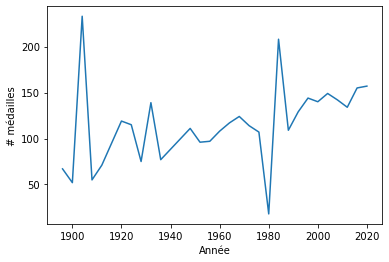

In [19]:
plt.figure()
plt.plot(res_gr_by_date.index, res_gr_by_date.values)
plt.xlabel("Année")
plt.ylabel("# médailles")

In [20]:
# Export the result into a csv to be read by the dashboard
res_gr_summer.to_csv("data/results.csv")

In [21]:
res_gr_summer.keys()

Index(['game_slug', 'game_end_date', 'game_start_date', 'game_location',
       'game_name', 'game_season', 'game_year', 'discipline_title',
       'event_title', 'slug_game', 'participant_type', 'medal_type',
       'athletes', 'rank_equal', 'rank_position', 'country_name',
       'country_code', 'country_3_letter_code', 'athlete_url',
       'athlete_full_name', 'value_unit', 'value_type', 'date', 'sexe'],
      dtype='object')